In [46]:
from sklearn.metrics import confusion_matrix
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [110]:
google_search = [
    'Eragon', 'The Sword of Shannara', 'The Lord of The Rings', 'The Silmarillion', 'The Last Wish',
    'Blood of Aenarion', 'The Hobbit', 'The Children of Hurin', 'Fierce Heart',
    'Elvish', 'The Goblin Emperor', 'Forsaken House', 'Original Shannara Trilogy', 'The Elven',
    'The Inheritance Cycle', 'The Fellowship of The Ring', 'Homeland', 'The Scions of Shannara', 'Royal Magic'
]

popular_fantasy_elves = [
     'The Hobbit',
     'The Fellowship of The Ring',
     'Harry Potter',
     'The Silmarillion',
     'The Witcher',
     'A Field Guide to Otherkin',
     'The Sword of Shannara',
     'Dragon Raja',
     'The Inheritance Cycle',
     'The Last Ringbearer',
     'Elven Star',
     'The Southern Vampire Mysteries',
     'Lords and Ladies',
     'Dragons of Winter Night',
     'The Laundry Files',
     'The Halfblood Chronicles',
     'The Last Wish',
     'The Tempest',
     'The Science of Discworld II']

In [111]:
us_president_bio = [
    'No Ordinary Time: Franklin & Eleanor Roosevelt: The Home Front in World War II',
    'Upstairs at the White House: My Life with the First Ladies',
    'The Demon of Unrest: A Saga of Hubris, Heartbreak, and Heroism at the Dawn of the Civil War',
    'The Accidental President: Harry S. Truman and the Four Months That Changed the World',
    'Teddy and Booker T.: How Two American Icons Blazed a Path for Racial Equality',
    'Coolidge',
    'Kissinger: A Biography',
    'Five Days in November',
    'The River of Doubt: Theodore Roosevelt\'s Darkest Journey',
    'And There Was Light: Abraham Lincoln and the American Struggle',
    'Founding Partisans: Hamilton, Madison, Jefferson, Adams and the Brawling Birth of American Politics',
    '1917: Lenin, Wilson, and the Birth of the New World Disorder'
    'Killing Kennedy: The End of Camelot (Bill O\'Reilly\'s Killing Series)',
    'To Rescue the Constitution: George Washington and the Fragile American Experiment',
    'Killing Reagan: The Violent Assault That Changed a Presidency (Bill O\'Reilly\'s Killing Series)'
    'Abraham Lincoln, 2nd Edition: Redeemer President (Library of Religious Biography (LRB))',
    'President Garfield: From Radical to Unifier',
    'A Promised Land',
    'Not in Your Lifetime: The Defining Book on the J.F.K. Assassination',
    'Team of Rivals: The Political Genius of Abraham Lincoln',
    'Grant'
]

my_us_president_bio = [
    'American Lion',
    'Wilson',
    'Truman',
    'Washington: A Life',
    'George Orwell',
    'Trump Revealed',
    'Profiles in Courage', 
    'Men of Mark: Eminent Progressive and Rising',
    'Grant',
    'Dreams from My Father',
    'Carter Beats The Devil',
    'Harry S. Truman: A Life', 
    'Freedom for the Thought That We Hate: A Biography of the First Amendment',
    'Masters of the Universe: Hayek Friedman and the Birth of Neoliberal Poltics',
    'Loving Pablo Hating Escobar',
    'Too Much and Never Enough: How My Family Created the World\'s Most Dangerous Man',
    'Brigham Young: American Moses',
    'Education and Democracy: The Meaning of Alexander Meiklejohn',
    'To Kill a Mockingbird',
    'The Fiery Trial: Abraham Lincoln and American Slavery'
]

In [103]:
popular_fantasy_elves = [
     'The Hobbit',
     'The Fellowship of The Ring',
     'Harry Potter',
     'The Silmarillion',
     'The Witcher',
     'A Field Guide to Otherkin',
     'The Sword of Shannara',
     'Dragon Raja',
     'The Inheritance Cycle',
     'The Last Ringbearer',
     'Elven Star',
     'The Southern Vampire Mysteries',
     'Lords and Ladies',
     'Dragons of Winter Night',
     'The Laundry Files',
     'The Halfblood Chronicles',
     'The Last Wish',
     'The Tempest',
     'The Science of Discworld II']
elves_relevance = [1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0]

us_president_bio = [
    'American Lion',
    'Wilson',
    'Truman',
    'Washington: A Life',
    'George Orwell',
    'Trump Revealed',
    'Profiles in Courage', 
    'Men of Mark: Eminent Progressive and Rising',
    'Grant',
    'Dreams from My Father',
    'Carter Beats The Devil',
    'Harry S. Truman: A Life', 
    'Freedom for the Thought That We Hate: A Biography of the First Amendment',
    'Masters of the Universe: Hayek Friedman and the Birth of Neoliberal Poltics',
    'Loving Pablo Hating Escobar',
    'Too Much and Never Enough: How My Family Created the World\'s Most Dangerous Man',
    'Brigham Young: American Moses',
    'Education and Democracy: The Meaning of Alexander Meiklejohn',
    'To Kill a Mockingbird',
    'The Fiery Trial: Abraham Lincoln and American Slavery'
]
us_president_relevance = [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]

scifi_relevance = [0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1]
best_scifi = '-' * len(scifi_relevance)

climate_change_relevance = [1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1]
climage_change = '-' * len(climate_change_relevance)

bs_fantasy_relevance = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
bs_fantasy = '-' * 20
bs_fantasy_relevant = 24  # approx 24 fantasy books published by BS that have articles on wikipedia

rowling_relevance = [1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # all 7 crime books by rowling found
rowling = '-' * 20

In [104]:
def precision_recall(books, relevance, relevant_count=None):
    df = pd.DataFrame({
        'book': books,
        'relevance': relevance
    })
    
    precision, recall = [], []
    relevant, total = 0, 0
    all_relevant = sum(df.relevance) if relevant_count is None else relevant_count
    
    for _, row in df.iterrows():
        relevant += row['relevance']
        total += 1
        precision.append(relevant/total)
        recall.append(relevant/all_relevant)
    
    df['precision'] = precision
    df['recall'] = recall
    return df

In [99]:
def plot_pr_curve(ax, df, label, color):
    """Plot Precision-Recall curve (ROC)"""
    ax.plot(df['recall'], df['precision'], '-o', label=label, color=color, alpha=0.5)
    ax.set_ylim([0, 1.05])
    ax.set_xlabel('Recall', fontsize=14)
    ax.set_ylabel('Precision', fontsize=14)
    ax.set_title('Precision-Recall Curve (ROC)', fontsize=16)

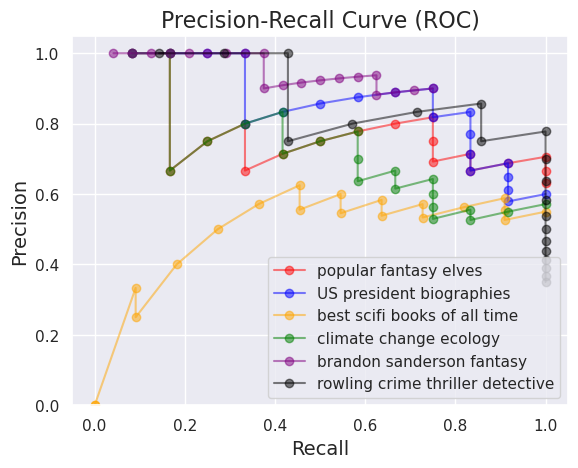

In [109]:
fig, ax = plt.subplots(1, 1)

df = precision_recall(popular_fantasy_elves, elves_relevance)
plot_pr_curve(ax, df, 'popular fantasy elves', 'red')

df = precision_recall(us_president_bio, us_president_relevance)
plot_pr_curve(ax, df, 'US president biographies', 'blue')

df = precision_recall(best_scifi, scifi_relevance)
plot_pr_curve(ax, df, 'best scifi books of all time', 'orange')

df = precision_recall(climage_change, climate_change_relevance)
plot_pr_curve(ax, df, 'climate change ecology', 'green')

df = precision_recall(bs_fantasy, bs_fantasy_relevance, bs_fantasy_relevant)
plot_pr_curve(ax, df, 'brandon sanderson fantasy', 'purple')

df = precision_recall(rowling, rowling_relevance)
plot_pr_curve(ax, df, 'rowling crime thriller detective', 'black')

ax.legend(loc='lower right');

In [112]:
import time
int(time.time())

1702220747